In [1]:
import pandas as pd
import numpy as np
import PyPDF2
import string
import re
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk import word_tokenize
pd.set_option('display.max_columns', 100)

In [2]:
with open('dictionary.pickle', 'rb') as handle:
    b = pickle.load(handle)
Cases = pd.read_csv('data/Cases2018.csv', encoding='iso-8859-1')

In [3]:
#key_to_value_lengths = {k:len(v) for k, v in b.items()}
newdict = {k: v for k, v in b.items() if len(v) > 60000}

In [4]:
Labels = Cases[['docket','partyWinning']]
Text = pd.DataFrame.from_dict(newdict, orient="index")

In [5]:
Text = Text.rename(index=str, columns={0: "Document"})

In [6]:
Text['docket'] = Text.index
Text.reset_index(drop=True)

,Document,docket
0,1 IN THE SU...,00-1011
1,12\n3\n4\n5\n6\n7\n8\n910\n11\n12\n13\n14\n15\...,00-1021
2,1 2 \n ...,00-1045
3,12345678910\n111213141516171819202122232425 IN...,00-10666
4,12\n3\n4\n5\n6\n7\n8\n910\n11\n12\n13\n14\n15\...,00-1073
5,1234\n5\n678\n910\n11\n12\n131415\n161718\n19\...,00-1089
6,12\n3\n4\n5\n6\n7\n8\n910\n11\n12\n13\n14\n15\...,00-1167
7,12\n3\n4\n5\n6\n7\n8\n910\n11\n12\n13\n14\n15\...,00-1187
8,1 IN THE SU...,00-121
9,12\n3\n4\n5\n6\n7\n8\n910\n11\n12\n13\n14\n15\...,00-1214


In [7]:
Text = pd.merge(Text, Labels, on='docket', how='inner')
Text.drop(Text[Text.partyWinning==2.0].index, inplace = True)
Labels = Text[['partyWinning']]
Text.drop('partyWinning', axis=1, inplace= True)

In [8]:
Text['Document'] = Text['Document'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Text['Document'].head()

0    1 in the supreme court of the united states 2 ...
1    12 3 4 5 6 7 8 910 11 12 13 14 15 16 17 18 19 ...
2    1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
3    12345678910 111213141516171819202122232425 in ...
4    12 3 4 5 6 7 8 910 11 12 13 14 15 16 17 18 19 ...
Name: Document, dtype: object

In [9]:
Text['Document'] = Text['Document'].str.replace('[^\w\s]',' ')
Text['Document'][0]

'1 in the supreme court of the united states 2                                x 3 deboris calcano martinez    4 et al     5 petitioners   6 v    no 00 1011 7 immigration and naturalization   8 service    9                                x 10 washington  d c  11 tuesday  april 24  2001 12 the above entitled matter came on for oral 13 argument before the supreme court of the united states at 14 10 17 a m  15 appearances  16 lucas guttentag  esq   new york  new york  on behalf of 17 the petitioners  18 edwin s  kneedler  esq   deputy solicitor general  19 department of justice  washington  d c   on behalf of 20 the respondent  21 22 23 24 25 1 alderson reporting company  inc  1111 fourteenth street  n w  suite 400 washington  d c  20005  202 289 2260  800  for depo 1 c o n t e n t s 2 oral argument of page 3 lucas guttentag  esq  4 on behalf of the petitioner 3 5 oral argument of 6 edwin s  kneedler  esq  7 on behalf of the respondent 25 8 rebuttal argument of 9 lucas guttentag  esq  10 o

In [10]:
user_defined_stop_words = ['-x','--','x•','n','w','e','lucas','seem','certainly','client ', ' client','properly', 'ground','hear','kind','new','york','et','al','washington','client','oral','okay','came','petitioner ','petitioner',' petitioner','question','attorney','edwin','deputy','fourteenth','st','esq','april','cyr', 'inc', 'kneedler', 'guttentag', 'monday','tuesday','x','v','alderson','petitioner','respondent','reporting','company','supreme','court','united','states','states•','•v','•petitioner'] 

i = stopwords.words('english')
j = list(string.punctuation) + user_defined_stop_words

stoplist = set(i).union(j)

In [11]:
Text['Document'] = Text['Document'].apply(lambda x: " ".join(x for x in x.split() if x not in stoplist and not x[0].isdigit()))
Text['Document'].head()

0    deboris calcano martinez petitioners immigrati...
1    rush prudential hmo deborah c moran c wednesda...
2    trw adelaide andrews c october entitled matter...
3    william joseph harris c march entitled matter ...
4    owasso independent school district aka owasso ...
Name: Document, dtype: object

In [12]:
freq = pd.Series(' '.join(Text['Document']).split()).value_counts()[:100]

In [13]:
freq = list(freq.index)
Text['Document'] = Text['Document'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Text['Document'].head()

0    deboris calcano martinez petitioners immigrati...
1    rush prudential hmo deborah moran wednesday ja...
2    trw adelaide andrews october entitled appearan...
3    william joseph harris march entitled appearanc...
4    owasso independent school aka owasso public sc...
Name: Document, dtype: object

In [14]:
freq = pd.Series(' '.join(Text['Document']).split()).value_counts()[-100:]

In [15]:
freq = list(freq.index)
Text['Document'] = Text['Document'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Text['Document'].head()

0    deboris calcano martinez petitioners immigrati...
1    rush prudential hmo deborah moran wednesday ja...
2    trw adelaide andrews october entitled appearan...
3    william joseph harris march entitled appearanc...
4    owasso independent school aka owasso public sc...
Name: Document, dtype: object

In [16]:
from textblob import Word
Text['Document'] = Text['Document'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Text['Document'].head()

0    deboris calcano martinez petitioner immigratio...
1    rush prudential hmo deborah moran wednesday ja...
2    trw adelaide andrew october entitled appearanc...
3    william joseph harris march entitled appearanc...
4    owasso independent school aka owasso public sc...
Name: Document, dtype: object

In [17]:
Text['Document'][0]

'deboris calcano martinez petitioner immigration naturalization service entitled appearance petitioner solicitor department rebuttal p r g rehnquist number deboris calcano martinez immigration naturalization service please jurisdictional presented legal ruling pure compelling deportation long legal permanent resident reviewable never country history alien deportation without judicial branch determining legal validity administrative deportation order submit constitution permit denying judicial scrutiny ruling deprive appeal considering pure presented legal validity deportation respect deportable understood conceded met qualification deportation client deportability ground deportation without adjudication application discretionary relief order deportation complaining accord discretionary relief ground asserting deportable opportunity challenge order deportation entered entered qualification deportation existed complaint exercise discretion stay country nonetheless disagree respectfully o

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Text.Document, Labels, test_size=0.2, random_state=23)
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [19]:
X_train.loc[0]

'deboris calcano martinez petitioner immigration naturalization service entitled appearance petitioner solicitor department rebuttal p r g rehnquist number deboris calcano martinez immigration naturalization service please jurisdictional presented legal ruling pure compelling deportation long legal permanent resident reviewable never country history alien deportation without judicial branch determining legal validity administrative deportation order submit constitution permit denying judicial scrutiny ruling deprive appeal considering pure presented legal validity deportation respect deportable understood conceded met qualification deportation client deportability ground deportation without adjudication application discretionary relief order deportation complaining accord discretionary relief ground asserting deportable opportunity challenge order deportation entered entered qualification deportation existed complaint exercise discretion stay country nonetheless disagree respectfully o

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1, 4), min_df = 2, max_df = .5)
X_train_tfidf = vectorizer.fit_transform(X_train)


In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#count_vect = CountVectorizer(ngram_range=(2, 3))
#X_train_counts = count_vect.fit_transform(X_train)
#X_train_counts.shape

In [21]:
list(vectorizer.vocabulary_.keys())

['immigration',
 'naturalization',
 'service',
 'rehnquist',
 'jurisdiction',
 'merit',
 'reasonably',
 'construed',
 'conclude',
 'ineligible',
 'discretionary',
 'relief',
 'repeal',
 'habeas',
 'corpus',
 'recent',
 'instructive',
 'judicial',
 'forum',
 'american',
 'arab',
 'anti',
 'discrimination',
 'committee',
 'reno',
 'concluded',
 'selective',
 'enforcement',
 'judicially',
 'cognizable',
 'defense',
 'removal',
 'law',
 'personal',
 'aside',
 'follows',
 'fortiori',
 'failure',
 'grant',
 'purely',
 'objection',
 'non',
 'fanciful',
 'deportation',
 'suspension',
 'entertain',
 'alien',
 'executive',
 'acting',
 'granted',
 'reviewable',
 'legislation',
 'inadequate',
 'cover',
 'covered',
 'fundamental',
 'referred',
 'ahead',
 'overlooked',
 'subsection',
 'establishes',
 'carves',
 'expedited',
 'knew',
 'preserve',
 'name',
 'category',
 'iirira',
 'aedpa',
 'repealed',
 'custody',
 'eliminated',
 'eliminating',
 'providing',
 'fully',
 'adequate',
 'substitute',
 'con

In [22]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#X_train_tfidf.shape
X_train_tfidf[0]

<1x421306 sparse matrix of type '<class 'numpy.float64'>'
	with 2229 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=.01).fit(X_train_tfidf, y_train)

In [ ]:
#key_to_value_lengths = {k:len(v) for k, v in b.items()}

In [ ]:
#key_to_value_lengths['14-1146']

In [24]:
X_new_tfidf = vectorizer.transform(X_test)

predicted = clf.predict(X_new_tfidf)


In [25]:
score2 = metrics.accuracy_score(y_test, predicted)

In [26]:
score2

0.6836734693877551

In [27]:
clf = SGDClassifier(loss='log', penalty='l2',alpha=.001, random_state=23, n_jobs=-1, n_iter = 3200)

In [28]:
mod2 =  clf.fit(X_train_tfidf, y_train)
predicted_svm = mod2.predict(X_new_tfidf)
score2 = metrics.accuracy_score(y_test, predicted_svm)
print("accuracy:   %0.3f" % score2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.689


In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted_svm).ravel()

In [30]:
(tn,fp,fn,tp)

(3, 58, 3, 132)

In [31]:
pred_proba_df = pd.DataFrame(clf.predict_proba(X_new_tfidf))
threshold_list = [.40, .49, .515, .505, .65]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.reshape(y_test.size,1),
                                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1))
    print('The testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.reshape(y_test.size,1),
                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.4 ******
The testing accuracy is 0.6938775510204082
[[  1  60]
 [  0 135]]

******** For i = 0.49 ******
The testing accuracy is 0.6836734693877551
[[  2  59]
 [  3 132]]

******** For i = 0.515 ******
The testing accuracy is 0.6887755102040817
[[  6  55]
 [  6 129]]

******** For i = 0.505 ******
The testing accuracy is 0.6887755102040817
[[  4  57]
 [  4 131]]

******** For i = 0.65 ******
The testing accuracy is 0.5051020408163265
[[22 39]
 [58 77]]


In [ ]:
len(Labels)

In [ ]:
len(X_train)

In [ ]:
X_train_tfidf[0]

In [ ]:
Text.Document[0]

In [ ]:
X_train_tfidf[6]

In [ ]:
X_new_tfidf[0]

In [ ]:
Text.Document[1]

In [ ]:
Text.head()

In [ ]:
predicted[139]

In [ ]:
X_test[139]

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
grid = {
    'alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 4],
    'penalty': ['l2'],
    'loss':['log'], 
    'n_jobs': [-1],
    'n_iter' : [3200],
    'random_state' : [23]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           X_train_tfidf, y_train, X_new_tfidf, y_test, 
           metric = roc_auc_score, greater_is_better=True, scoreLabel = "AUC")
print(bestModel, bestScore)

In [32]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [33]:
def top_feats_in_doc(Xtr, features, row_id, top_n=15):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [34]:
features = vectorizer.get_feature_names()

In [35]:
top_feats_in_doc(X_train_tfidf, features, 0)

,feature,tfidf
0,removal,0.217051
1,legal consequence,0.209888
2,deportation,0.201903
3,alien,0.182809
4,habeas,0.171875
5,discretionary relief,0.166390
6,retroactivity,0.164845
7,relief,0.159599
8,landgraf,0.146815
9,retroactive,0.136612


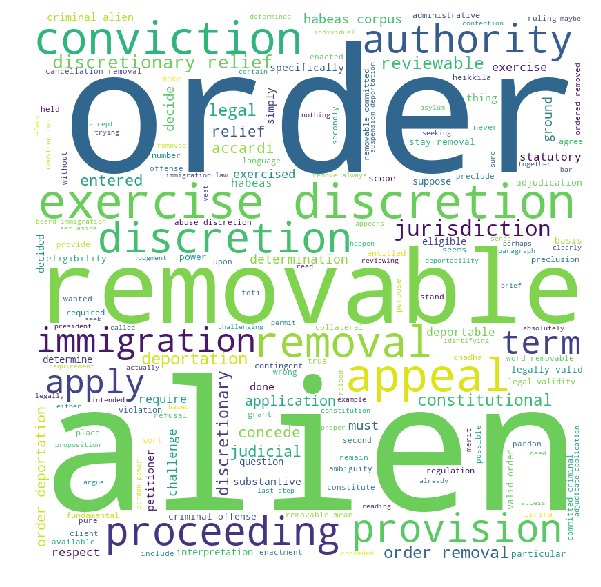

In [39]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(X_train[0]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [37]:
from wordcloud import WordCloud, STOPWORDS

In [38]:
import matplotlib.pyplot as plt